In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# File path
file_path = "growthcurve.xlsx"

# Read the Excel file
df = pd.read_excel(file_path, 'Sheet1')

In [3]:
# create a 2 new columns that take average and standard deviation of A1, A2,A3
df['avgA1-A3'] = df[['A1', 'A2', 'A3']].mean(axis=1)
df['stdA1-A3'] = df[['A1', 'A2', 'A3']].std(axis=1)
df['avgB1-B3'] = df[['B1', 'B2', 'B3']].mean(axis=1)
print(df.columns)

Index(['Time', 'T° 600', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'F1', 'F2', 'F3', 'F4', 'F5',
       'F6', 'F7', 'F8', 'avgA1-A3', 'stdA1-A3', 'avgB1-B3'],
      dtype='object')


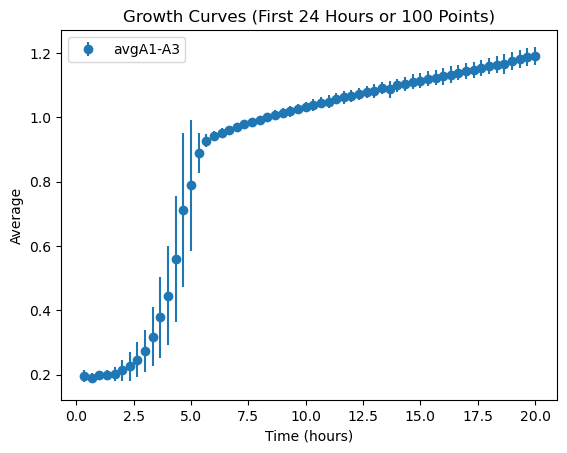

In [4]:
# Convert Time to Hours
df['Time_float'] = df['Time'].apply(lambda t: t.hour + t.minute/60 + t.second/3600)

# Truncate data (choose one)
#df_truncated = df[df['Time_float'] <= 24]  # Option 1: Keep first 24 hours
df_truncated = df.iloc[:60]  # Option 2: Keep first 100 rows

# Extract Columns
time = df_truncated['Time_float']
avgA1_A3 = df_truncated['avgA1-A3']
stdA1_A3 = df_truncated['stdA1-A3']

# Plot Growth Curve
plt.errorbar(time, avgA1_A3, yerr=stdA1_A3, linestyle='none', marker='o', label='avgA1-A3')

plt.xlabel('Time (hours)')
plt.ylabel('Average')
plt.title('Growth Curves (First 24 Hours or 100 Points)')
plt.legend()
plt.show()